<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/GenderRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GENDER RECOGNITION BY VOICE**

# **1. Introduction**


**Your client for this project is a Telecom Service Provider..**


*  They are a leading telecom company with 5 million users.
*  They want to keep track of the number of male and female users but as the user count increases the task becomes more tedious.
*  They want to automate the process of keeping track of male and female users using their voice

**Current Scenario:**

* Determining a person’s gender as male or female, based upon a sample of their voice, initially seems to be an easy task.

*   Often, the human ear can easily detect the difference between a male or a female voice within the first few spoken words.However, designing a computer program to do this turns out to be a bit trickier.






# **2. Problem Statement**
**The current process suffers from the following problems:**

*   The current process is a manual classification of gender using their voice.
*   This is very tedious and time-consuming as it needs to be repeated every time a new customer joins.

The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

**Your Role**
*  You are given a dataset consisting of recorded voice samples, collected from male and female speakers..
*  Your task is to build a classification model using the dataset.
*  Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


# **3. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import sklearn.linear_model.LogisticRegression as LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate,KFold,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve,auc,classification_report
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings


# **4. Data Acquisition & Description**

In [4]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Gender-Recognition-by-Voice/voice_train.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Gender-Recognition-by-Voice/voice_test.csv")
dataValidationId=dataValidation.Id
data.head()


,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,765,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,...,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,male
1,3071,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,...,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,female
2,1546,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,...,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,male
3,410,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,...,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,male
4,2689,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,...,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,female


### **4.1 Data Information**

- In this section we will see the **information about the types of the features**.




In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [6]:
data.describe()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,...,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1591.565416,0.180923,0.057143,0.185722,0.140349,0.224730,0.084381,3.118469,35.808329,0.895312,...,0.165481,0.180923,0.142891,0.036834,0.258968,0.833608,0.052634,5.075745,5.023111,0.173933
std,909.939169,0.029796,0.016588,0.036175,0.048628,0.023509,0.042728,4.163727,131.430900,0.044795,...,0.076918,0.029796,0.032191,0.019182,0.029806,0.525565,0.062982,3.526201,3.525193,0.119463
min,1.000000,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,...,0.000000,0.039363,0.055565,0.009775,0.108696,0.007812,0.004883,0.007812,0.000000,0.000000
25%,808.500000,0.163739,0.042082,0.169726,0.111139,0.208756,0.042663,1.638410,5.604497,0.862190,...,0.118100,0.163739,0.117578,0.018223,0.253968,0.423799,0.007812,2.207031,2.183594,0.099591
50%,1590.000000,0.184848,0.059151,0.190067,0.140229,0.225729,0.094235,2.183320,8.255809,0.901840,...,0.186667,0.184848,0.140678,0.046921,0.271186,0.767578,0.023438,4.992188,4.968750,0.139159
75%,2382.500000,0.199061,0.066891,0.210650,0.175690,0.243700,0.114208,2.932962,13.649354,0.928727,...,0.221341,0.199061,0.169593,0.047904,0.277457,1.180411,0.070312,7.078125,7.042969,0.209525
max,3167.000000,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,...,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**


**Check null value or any other inconsistent value in column**

In [7]:
print((data=="").sum(), "\n")

Id          0
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64 



In [8]:
print(data.isna().sum(), "\n")


Id          0
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64 



In [9]:
print((data=="Unknown").sum(), "\n")


Id          0
meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64 



In [10]:
print((data==0).sum(), "\n")

Id            0
meanfreq      0
sd            0
median        0
Q25           0
Q75           0
IQR           0
skew          0
kurt          0
sp.ent        0
sfm           0
mode        205
centroid      0
meanfun       0
minfun        0
maxfun        0
meandom       0
mindom        0
maxdom        0
dfrange      54
modindx      54
label         0
dtype: int64 



In [11]:
data.duplicated().any()

False

In [ ]:
catCol=["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity",
        "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling",
        "PaymentMethod","Churn"]
for col in catCol:
  print(data[col].value_counts())



Male      2838
Female    2796
Name: gender, dtype: int64
0    4722
1     912
Name: SeniorCitizen, dtype: int64
No     2932
Yes    2702
Name: Partner, dtype: int64
No     3968
Yes    1666
Name: Dependents, dtype: int64
Yes    5087
No      547
Name: PhoneService, dtype: int64
No                  2700
Yes                 2387
No phone service     547
Name: MultipleLines, dtype: int64
Fiber optic    2479
DSL            1934
No             1221
Name: InternetService, dtype: int64
No                     2801
Yes                    1612
No internet service    1221
Name: OnlineSecurity, dtype: int64
No                     2498
Yes                    1915
No internet service    1221
Name: OnlineBackup, dtype: int64
No                     2473
Yes                    1940
No internet service    1221
Name: DeviceProtection, dtype: int64
No                     2781
Yes                    1632
No internet service    1221
Name: TechSupport, dtype: int64
No                     2246
Yes                

### **5.2 Data Cleaning**

- N/A

### **5.3 Data Post-Profiling**

- Next, we will generate and verify the report to identify any new observation that can help us in further analysis.

# **6. Exploratory Data Analysis**

In [15]:
data.describe().columns[1:]

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

### **Check distribution of numerical features and Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

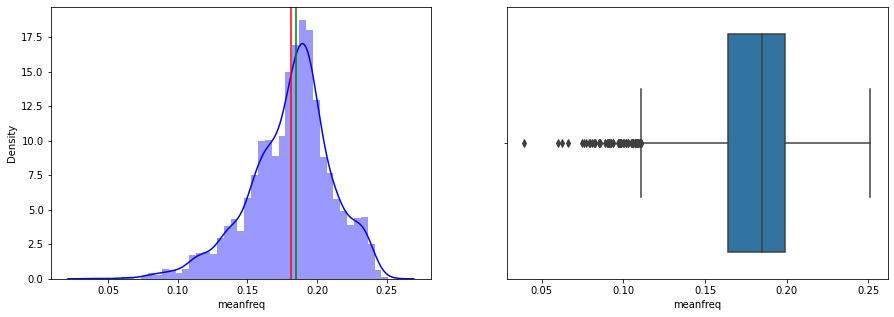

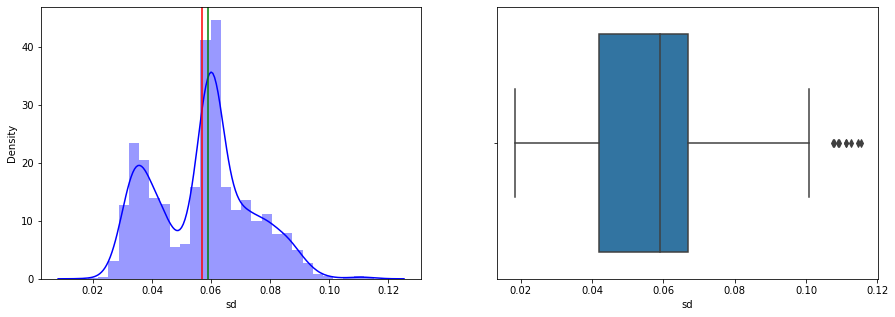

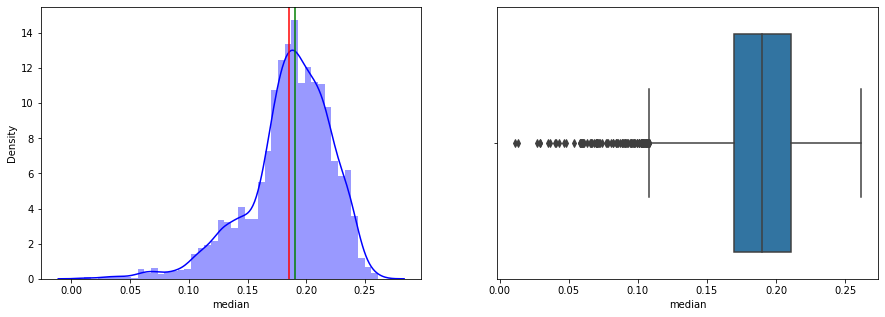

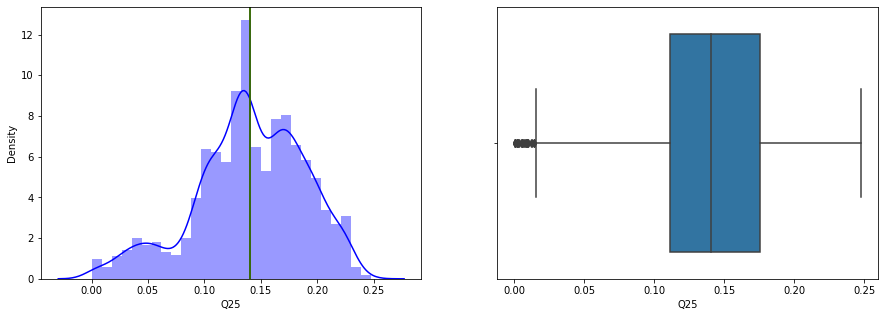

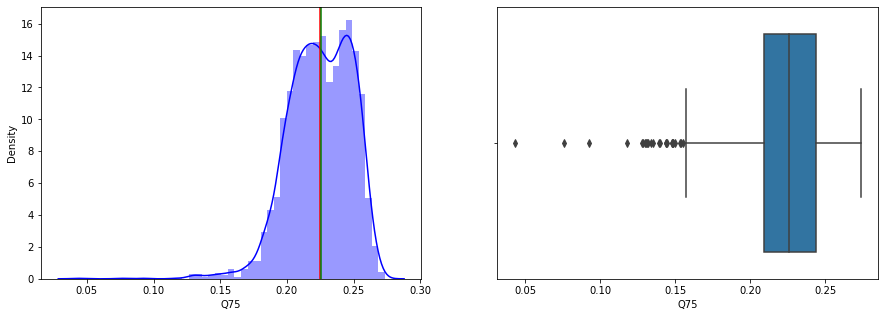

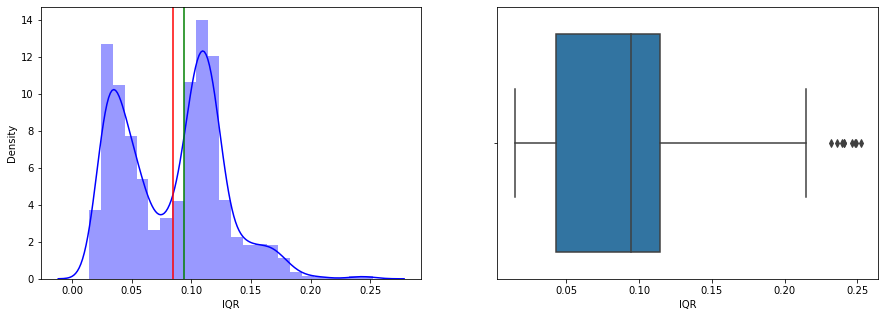

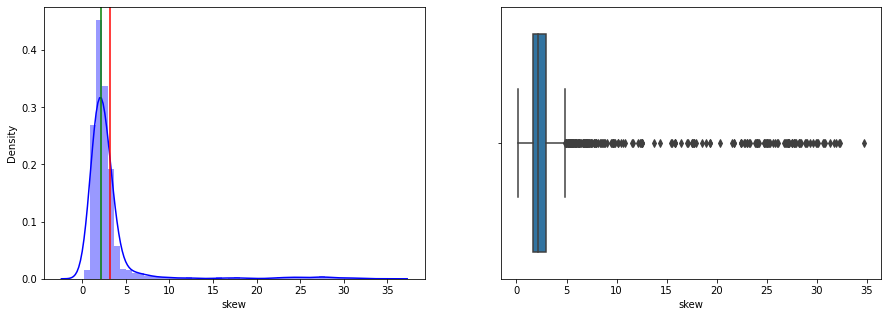

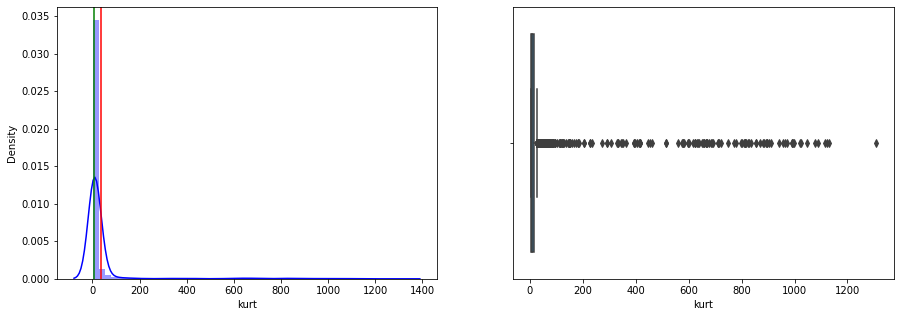

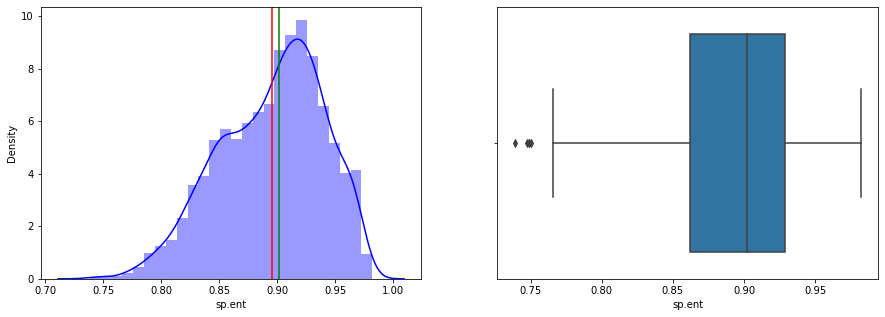

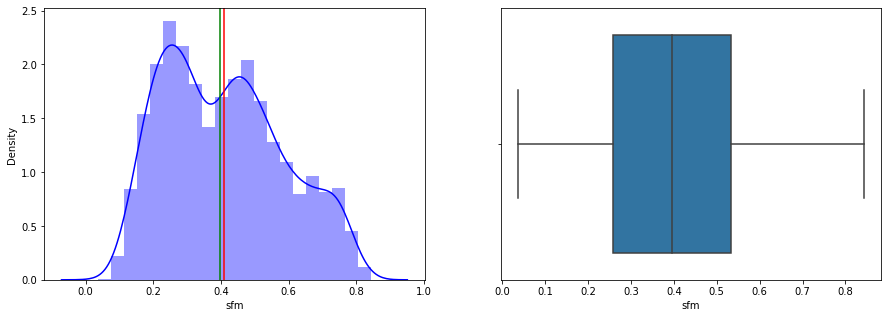

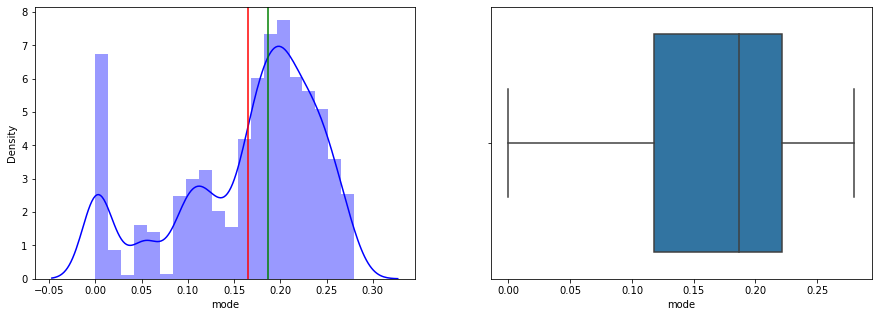

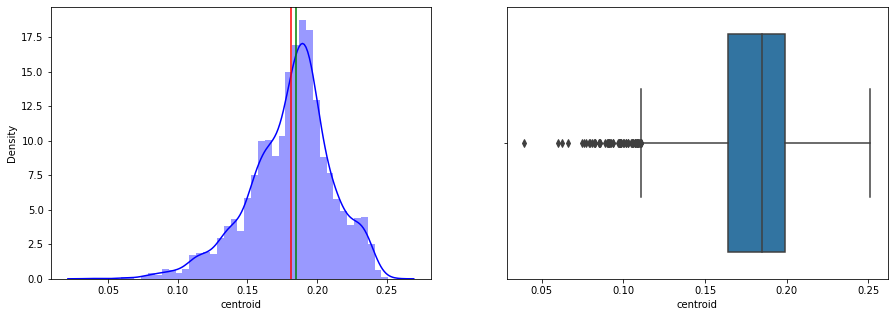

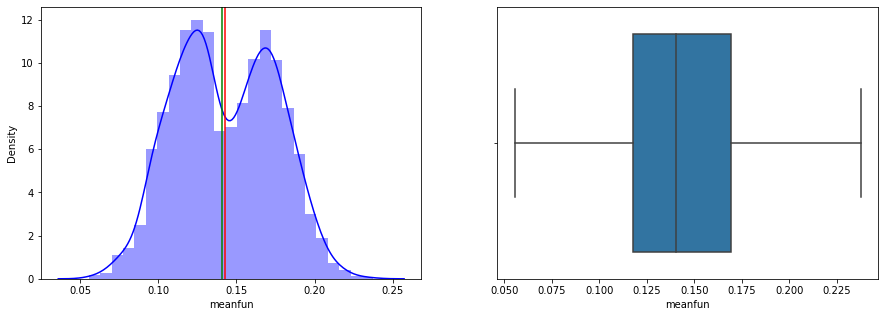

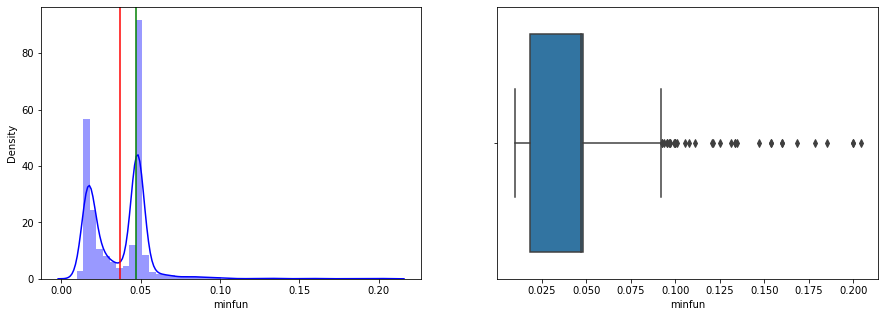

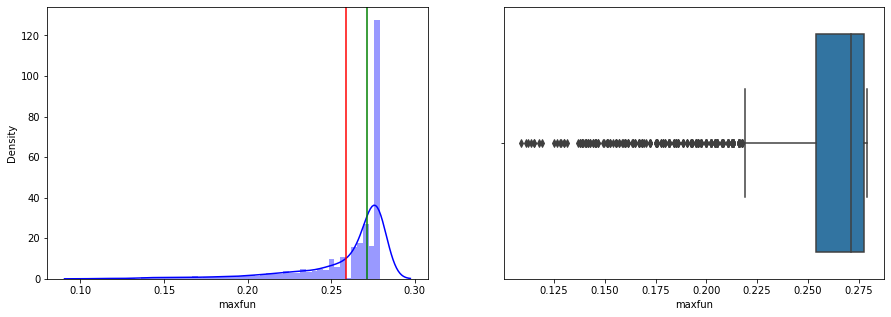

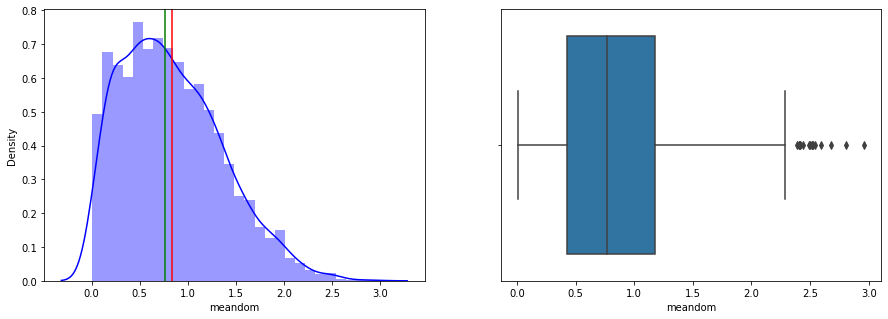

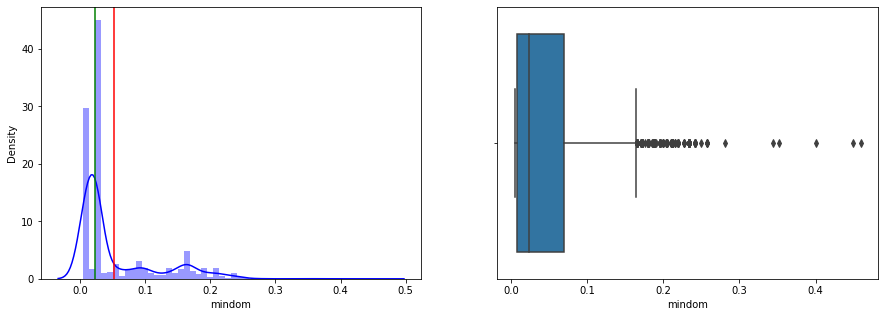

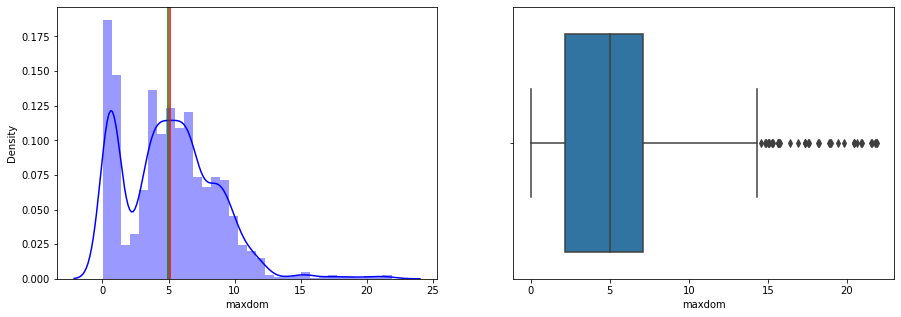

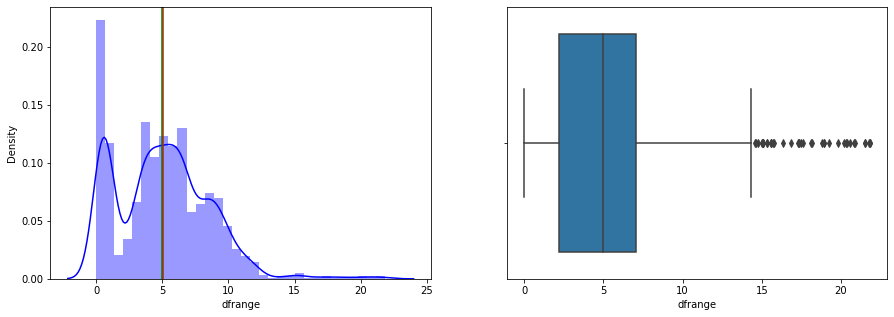

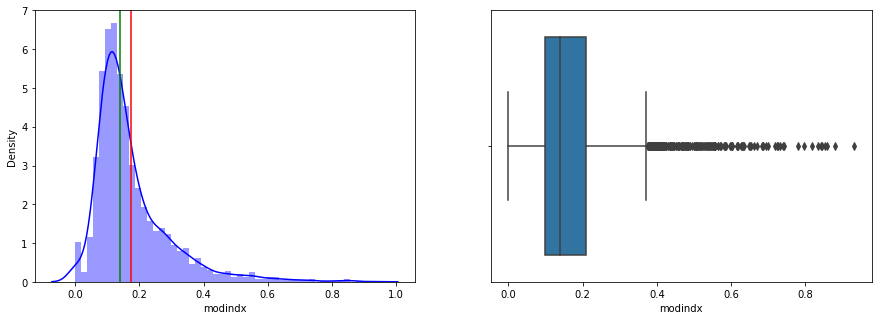

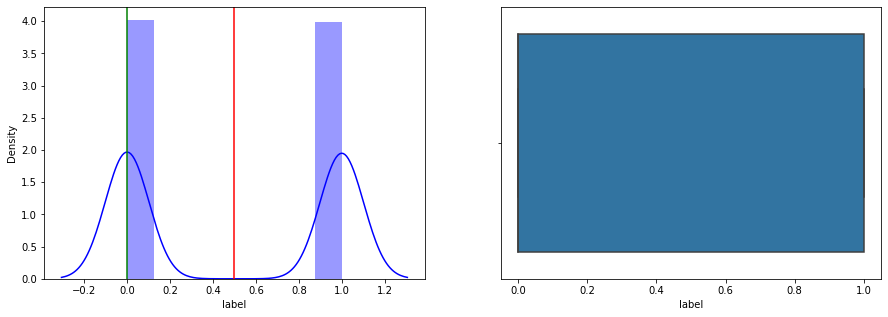

In [20]:
contColumn=data.describe().columns[1:]

for col in contColumn:  
  fig=plt.figure(figsize=[15,5])
  plt.subplot(1,2,1)
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")
  plt.subplot(1,2,2)
  sns.boxplot(data[col])


  

### **Correlation Matrix**

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.label= le.fit_transform(data.label)
data.label.value_counts()

0    1432
1    1419
Name: label, dtype: int64

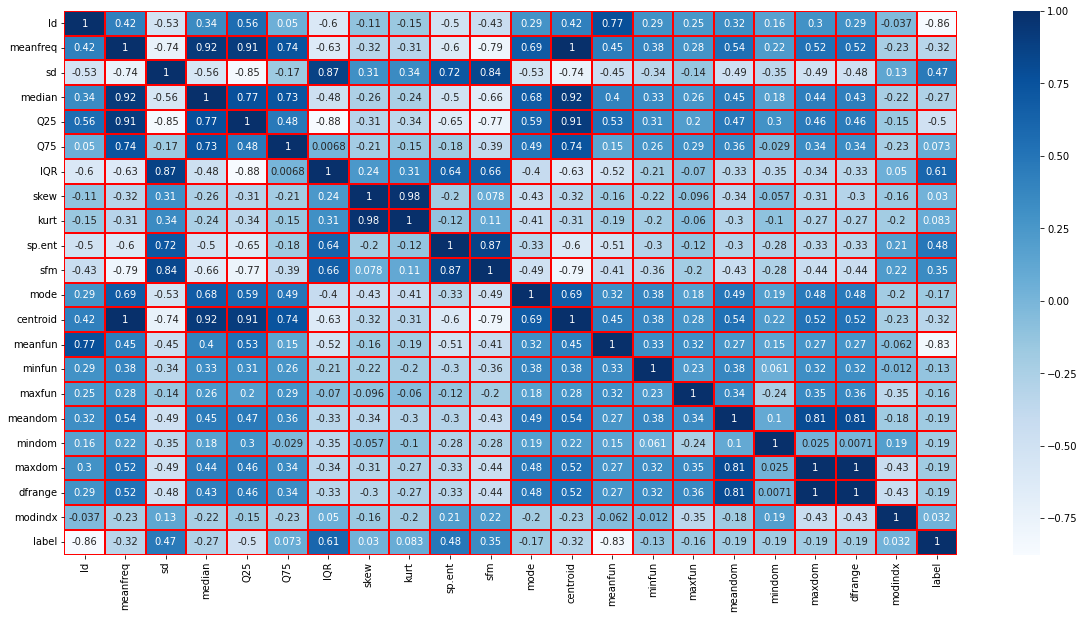

In [19]:
figure=plt.figure(figsize=[20,10])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor='Red',linewidth=1)

# **7. Data Post-Processing**

### **7.1 Data Preparation/Feature Selection**



In [23]:
data.describe().columns

Index(['Id', 'meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [27]:
features=['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'skew','sp.ent', 'mode', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'modindx']

X=data[features]
y=data.label
dataValidation=dataValidation[features]


# **8. Model Development & Evaluation**

### **With PipeLine**

In [39]:
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score,cross_validate,cross_val_predict
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
max_depth=7
modelList=[LogisticRegression(),DecisionTreeClassifier(max_depth=max_depth),
           RandomForestClassifier(random_state=47,max_depth=max_depth),GaussianNB(),KNeighborsClassifier(n_neighbors=8)]


# columns_to_scale=contColumn
kf=KFold(10,shuffle=True,random_state=47)
# Instantiate column transformer
# column_trans=make_column_transformer((OneHotEncoder(drop="first"),columns_to_encode),(RobustScaler(),columns_to_scale),remainder="passthrough")
cv_score_df=pd.DataFrame(columns=["Model","Train Score","Test Score","FitDiff"])
  # print(cv_score_df)
i=0
for model in modelList:
  if model!="LogisticRegression()":
    cv_score=cross_validate(model,X,y,cv=kf,n_jobs=-1,scoring="f1",return_train_score=True)
  else:
    column_trans=make_column_transformer((RobustScaler(),features),remainder="passthrough")
    pipe=make_pipeline(column_trans,model)
    cv_score=cross_validate(pipe,X,y,cv=kf,n_jobs=-1,scoring="f1",return_train_score=True)
  cv_score_df.loc[i]=[model,cv_score["train_score"].mean(),cv_score["test_score"].mean(),cv_score["train_score"].mean()-cv_score["test_score"].mean()]
  i=i+1
print(cv_score_df)
# pipe=make_pipeline(column_trans,modelList[2])
# pipe.fit(X,y)



                                               Model  Train Score  Test Score  \
0                               LogisticRegression()     0.908951    0.907648   
1                DecisionTreeClassifier(max_depth=7)     0.991188    0.959561   
2  RandomForestClassifier(max_depth=7, random_sta...     0.991694    0.971702   
3                                       GaussianNB()     0.898580    0.897762   
4                KNeighborsClassifier(n_neighbors=8)     0.800463    0.741689   

    FitDiff  
0  0.001302  
1  0.031627  
2  0.019991  
3  0.000818  
4  0.058774  


# **9. Dump Model using Pickle**

In [40]:
import pickle
model=RandomForestClassifier(random_state=47,max_depth=max_depth)
model.fit(X,y)
##dump the model into a file
with open("/content/drive/MyDrive/Colab Notebooks/ModelBin/TeleChurn_model.pkl", 'wb') as f_out:
    pickle.dump(model, f_out) # write final_model in .bin file
    f_out.close()  # close the file 

# **10. Load Model using Pickle and Predict Output**

In [41]:
##loading the model from the saved file
with open('/content/drive/MyDrive/Colab Notebooks/ModelBin/TeleChurn_model.pkl', 'rb') as f_in:
    model = pickle.load(f_in)

##Predict
dataValidation_pred=model.predict(dataValidation)
print(dataValidation_pred)

submission = pd.DataFrame({'Id':dataValidationId,'Drug':dataValidation_pred})
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')

[0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1
 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1
 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0
 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>